In [18]:
# Standard Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Images 
import os
import glob
from PIL import Image


# Libraries for Evaluations and Train/Test Split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#Model Visualization
from ann_visualizer.visualize import ann_viz

#Others
from tqdm import tqdm  # Optional: tqdm for progress bar
from concurrent.futures import ThreadPoolExecutor

from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz
from ann_visualizer.visualize import ann_viz
import visualkeras
from PIL import ImageFont
from tensorflow.keras.models import load_model


<div class="alert alert-block alert-info">
<b>Training Metrics Explanation:</b>


  
Loss Formula:
  
  
Categorical Crossentropy Loss =$ - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{i,j} \cdot \log(\hat{y}_{i,j})$

  Where:
    - $N$ is the number of samples in the batch.
    - $C$ is the number of classes.
    - $y_{i,j}$ is 1 if the true class of sample \(i\) is \(j\), 0 otherwise.
    - $(\hat{y}_{i,j})$ is the predicted probability that sample \(i\) belongs to class \(j\).



In [4]:
# Define the root folder where your subfolders (class folders) are located
root_folder_path = '/path/to/your/root/folder'
root_folder_path = '/Users/linuszarse/Documents/UNI/Master-Uni Potsdam/3. Semester/Machine Learning 2/Klausurprojekt/garbage_classification'

# Define the ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,       # Rescale pixel values to be between 0 and 1
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Random zoom
    horizontal_flip=True, # Random horizontal flip
    validation_split=0.2  # Split data into training and validation sets
)

# Define the target image size
target_size = (256,256)  # Adjust according to your model's input size

# Create the training data generator
train_generator = datagen.flow_from_directory(
    root_folder_path,
    target_size=target_size,
    batch_size=32,         # Adjust based on your system's memory
    class_mode='categorical',  # Assumes a classification task
    subset='training'      # Specify 'training' for training data
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    root_folder_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'    # Specify 'validation' for validation data
)


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [ ]:
# Define the CNN model
num_classes = len(train_generator.class_indices)


In [13]:
model_cnn2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    #Flatten(),
    #Dense(512, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.5),
    
    Dense(num_classes, activation='softmax')
    ])


In [ ]:
model_cnn3 = tf.keras.models.Sequential([
    Conv2D(32 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2,2) , strides = 2 , padding = 'valid'),

    Conv2D(64 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'),
    MaxPooling2D((2,2) , strides = 2 , padding = 'valid'),
    
    Conv2D(64 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'),
    MaxPooling2D((2,2) , strides = 2 , padding = 'valid'),
    
    Conv2D(128 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'),
    MaxPooling2D((2,2) , strides = 2 , padding = 'valid'),
    
    Flatten(),
    Dense(units = 128 , activation = 'relu'),
    Dropout(0.2),
    Dense(units = num_classes, activation='softmax')  # Adjust 'num_classes' based on your task
])

In [19]:
tuner_dir = 'bayesian_optimization/garbage_classification'
model_path = 'best_models/hyperparameter_model.keras'
history_path = 'best_models'  # Verzeichnis, in dem die Historie gespeichert wird
history_filename_hp = 'best_model_hp_model_training_history.json'

hyperparameter_model = load_model(model_path)

In [22]:
model_path = '/Users/linuszarse/Documents/UNI/Master-Uni Potsdam/3. Semester/Machine Learning 2/Klausurprojekt/Best_Models/'
model_filename_vgg16_tl = 'best_model_vgg16_tl.keras'  # Update this to your VGG16 model filename
checkpoint_path_vgg16_tl = os.path.join(model_path, model_filename_vgg16_tl)

model_VGG16_transfer = load_model(checkpoint_path_vgg16_tl)    

In [23]:
model_path = '/Users/linuszarse/Documents/UNI/Master-Uni Potsdam/3. Semester/Machine Learning 2/Klausurprojekt/Best_Models/'
model_filename_ft = 'best_model_vgg16_ft.keras'
checkpoint_path_ft = os.path.join(model_path, model_filename_ft)

vgg16_ft = load_model(checkpoint_path_ft)

In [24]:
# Set the path for the model
model_path = '/Users/linuszarse/Documents/UNI/Master-Uni Potsdam/3. Semester/Machine Learning 2/Klausurprojekt/Best_Models/'
model_filename_resnet = 'best_model_resnet.keras'
checkpoint_path_resnet = os.path.join(model_path, model_filename_resnet)

model_resnet = load_model(checkpoint_path_resnet)

In [ ]:
model_cnn2, model_cnn3, hyperparameter_model, model_VGG16_transfer, vgg16_ft, model_resnet

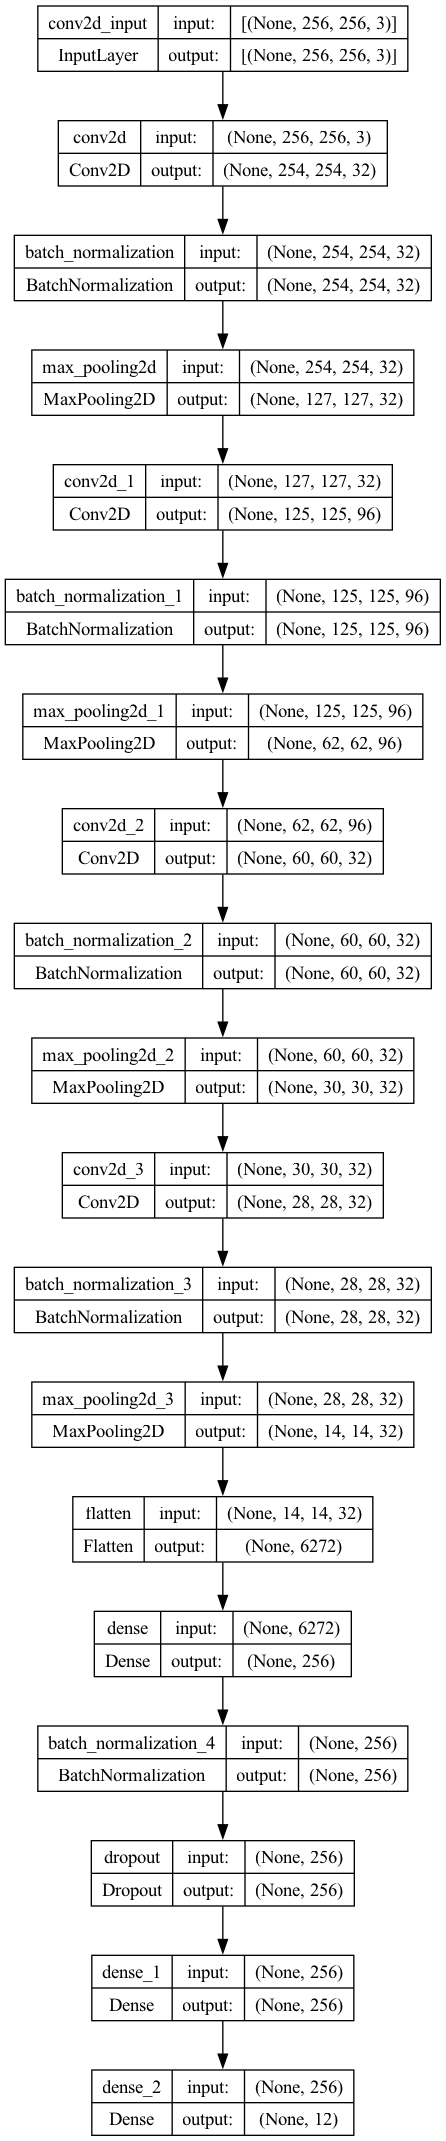

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(hyperparameter_model,

           to_file='keras_model_plot.png',

           show_shapes=True,

           show_layer_names=True)

In [27]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model_cnn2, legend=True)


AttributeError: 'ImageFont' object has no attribute 'getsize'

In [29]:
hyperparameter_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 96)      27744     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 96)      384       
 chNormalization)                                                
                                                        